### Часть 1. Модель хищник-жертва

Рассмотрим уравнения Лотки — Вольтерры для динамики популяции хищников и животных-жертв (классический пример системы ОДУ). Уравнения следующие: $x'(t) = ax - bxy$ и $y'(t) = cxy - dy$, где $x(t)$ - количество животных - жертв, а $y(t)$ - количество животных-хищников. Коэффициенты a, b, c и d описывают скорость процессов в модели. Например, $a$ - это скорость, с которой рождаются хищные животные, а $d$ - скорость, с которой хищные животные умирают. Коэффициенты $b$ и $c$ - это скорость, с которой хищники поедают добычу, и скорость, с которой популяция хищников растет за счет популяции жертвы, соответственно. Обратите внимание, что это нелинейная система ОДУ из-за членов $xy$.

Text(0, 0.5, 'Количество хищников')

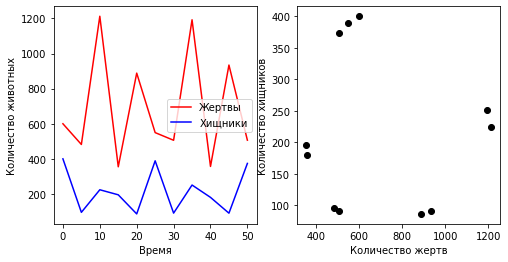

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return [a*x - b*x*y, c*x*y - d*y]

# начальные условия
xy_vec0 = [600, 400]
# сетка
t = np.linspace(0, 50, 11)
# решение пакетным методом
xy_t = integrate.odeint(f, xy_vec0, t)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[0].set_xlabel("Время")
axes[0].set_ylabel("Количество животных")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[1].set_xlabel("Количество жертв")
axes[1].set_ylabel("Количество хищников")

Слева - график зависимости популяции от времени, справа - фазовое пространство.

Задание: 

сколько узлов сетки достаточно для адекватного разрешения физики задачи? От чего это зависит? Как понять, сколько узлов задавать? 

Желательно провести исследование не только в текущей постановке задачи, но и в зависимости от параметров модели и начальных условий.

Ответ: число узлов должно быть пропорционально числу целых периодов решения на исследуемом отрезке(если решение периодическое). Для разрешения одного периода достаточно фиксированного числа точек, например 10.

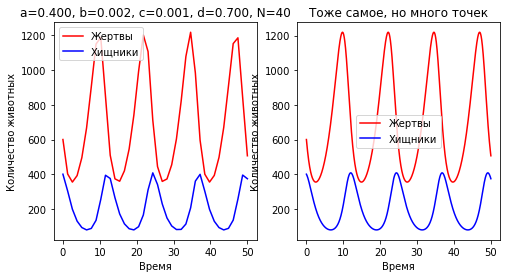

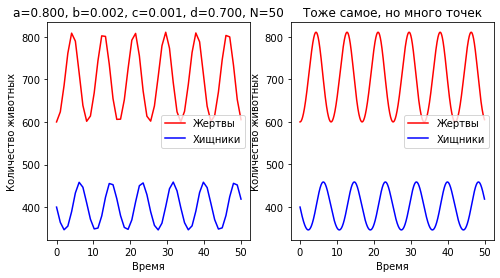

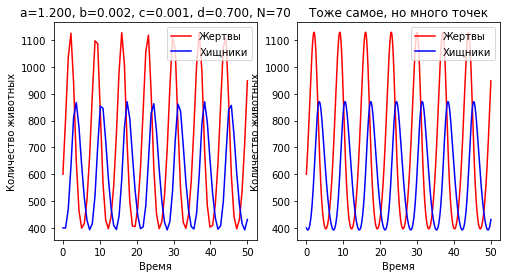

In [116]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

for i in range(1,4):
    # параметры модели
    a, b, c, d = i*0.4, 0.002, 0.001, 0.7 # проварьируем параметр a
    # правая часть системы
    def f(xy_vec, t):
        x, y = xy_vec
        return [a*x - b*x*y, c*x*y - d*y]
    
    T = 2*math.pi/math.sqrt(a*d) # вычисляем период по формуле
    N0=10
    N = N0*int(50/T)
    # начальные условия
    xy_vec0 = [600, 400]
    # сетка
    t = np.linspace(0, 50, N)
    t2 = np.linspace(0,50,10000)
    # решение пакетным методом
    xy_t = integrate.odeint(f, xy_vec0, t)
    xy_t2 =  integrate.odeint(f, xy_vec0, t2) #Решаем для большого числа точек
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].set_title(f"{a=:.3f}, {b=:.3f}, {c=:.3f}, {d=:.3f}, {N=}")
    axes[0].plot(t, xy_t[:,0], 'r', label="Жертвы")
    axes[0].plot(t, xy_t[:,1], 'b', label="Хищники")
    axes[0].set_xlabel("Время")
    axes[0].set_ylabel("Количество животных")
    axes[0].legend()
    axes[1].set_title("Тоже самое, но много точек")
    axes[1].plot(t2, xy_t2[:,0], 'r', label="Жертвы")
    axes[1].plot(t2, xy_t2[:,1], 'b', label="Хищники")
    axes[1].set_xlabel("Время")
    axes[1].set_ylabel("Количество животных")
    axes[1].legend()
    


### Часть 2. Метод высокого порядка

Задание: 
1. выписать расчетные формулы для задачи из Части 1 и реализовать метод РК первого и третьего порядка (не в общем для любой задачи Коши, а для конкретной из Части 1)
2. решить задачу этими методами в изначальной постановке. Сравнить решение с решением с помощью odeint. Оценить влияние точности метода на решение

***ваш ответ***

Text(0, 0.5, 'Количество хищников')

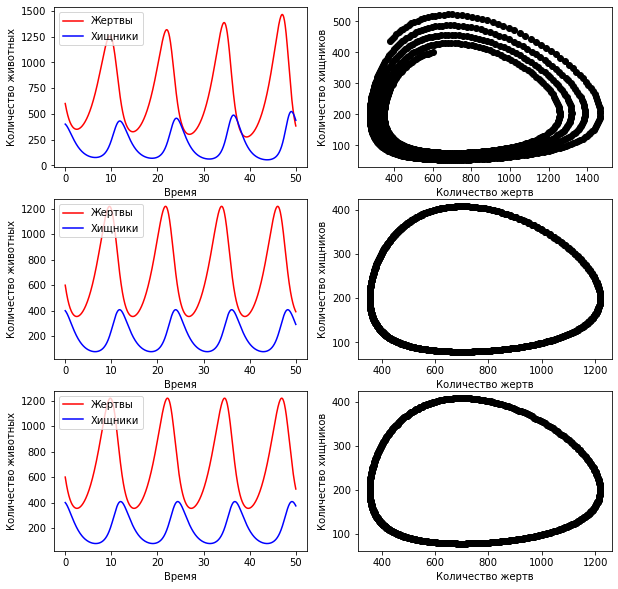

In [11]:
# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return np.array([a*x - b*x*y, c*x*y - d*y])

# начальные условия
xy_vec0 = np.array([600, 400])
# сетка
tmax = 50
n = 1000
h = (tmax+1)/n
t = np.linspace(0, tmax, n)

# метод РК 1 стадийный 1 порядка(метод эйлера).
xyvec=[]
xyvec.append(xy_vec0)
for i in range(len(t)-1): 
    k1=f(xyvec[i], t[i])
    xyvec.append(xyvec[i]+h*k1)
x1 = [i[0] for i in xyvec]
y1 = [i[1] for i in xyvec]

# метод РК 3 стадийный 3 порядка.
xyvec=[]
xyvec.append(xy_vec0)
for i in range(len(t)-1): 
    k1=f(xyvec[i], t[i])
    k2=f(xyvec[i] + 0.5*h*k1, t[i]+0.5*h)
    k3=f(xyvec[i] + h*(-k1+2*k2),t[i]+h)
    xyvec.append(xyvec[i]+h*(k1+4*k2+k3)/6.)
x3 = [i[0] for i in xyvec]
y3 = [i[1] for i in xyvec]

# метод odeint
xy_t = integrate.odeint(f, xy_vec0, t)


fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes[0,0].plot(t, x1, 'r', label="Жертвы")
axes[0,0].plot(t, y1, 'b', label="Хищники")
axes[0,0].set_xlabel("Время")
axes[0,0].set_ylabel("Количество животных")
axes[0,0].legend()
axes[0,1].plot(x1, y1, 'ko')
axes[0,1].set_xlabel("Количество жертв")
axes[0,1].set_ylabel("Количество хищников")

axes[1,0].plot(t, x3, 'r', label="Жертвы")
axes[1,0].plot(t, y3, 'b', label="Хищники")
axes[1,0].set_xlabel("Время")
axes[1,0].set_ylabel("Количество животных")
axes[1,0].legend()
axes[1,1].plot(x3, y3, 'ko')
axes[1,1].set_xlabel("Количество жертв")
axes[1,1].set_ylabel("Количество хищников")

axes[2,0].plot(t, xy_t[:,0], 'r', label="Жертвы")
axes[2,0].plot(t, xy_t[:,1], 'b', label="Хищники")
axes[2,0].set_xlabel("Время")
axes[2,0].set_ylabel("Количество животных")
axes[2,0].legend()
axes[2,1].plot(xy_t[:,0], xy_t[:,1], 'ko')
axes[2,1].set_xlabel("Количество жертв")
axes[2,1].set_ylabel("Количество хищников")

### Часть 3. Порядок точности метода

Найти численно и построить графики порядка методов из предыдущей части в зависимости от шага сетки в широком диапазоне шага. Объяснить, что мы видим на рисунке. 

<ipython-input-7-b2c872e409d9>:7: RuntimeWarning: overflow encountered in double_scalars
  return np.array([a*x - b*x*y, c*x*y - d*y])
<ipython-input-7-b2c872e409d9>:7: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([a*x - b*x*y, c*x*y - d*y])
<ipython-input-7-b2c872e409d9>:26: RuntimeWarning: overflow encountered in multiply
  xyvec.append(xyvec[i]+h*k1)


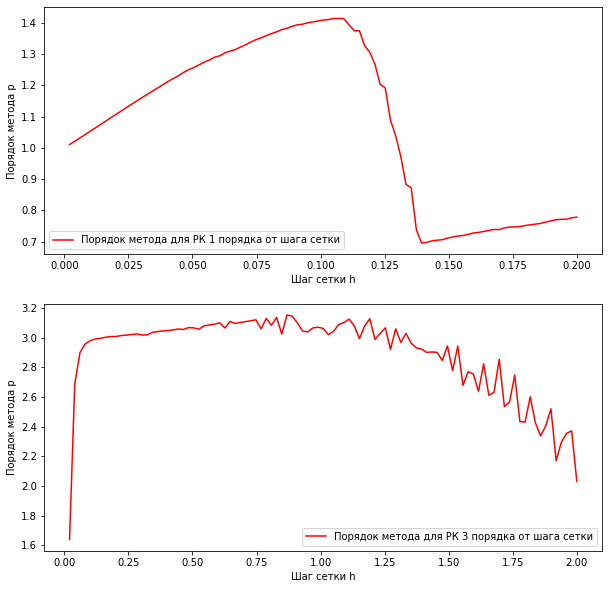

In [7]:
import numpy as np
# параметры модели
a, b, c, d = 0.4, 0.002, 0.001, 0.7
# правая часть системы
def f(xy_vec, t):
    x, y = xy_vec
    return np.array([a*x - b*x*y, c*x*y - d*y])

# начальные условия
xy_vec0 = np.array([600, 400])
tmax = 50

def errors(h):
    # сетка
    t = np.arange(0,tmax,h, )
    if len(t) < 2:
        return None
    # метод odeint
    xy_t = integrate.odeint(f, xy_vec0, t)

    # метод РК 1 стадийный 1 порядка(метод эйлера).
    xyvec=[]
    xyvec.append(xy_vec0)
    for i in range(len(t)-1): 
        k1=f(xyvec[i], t[i])
        xyvec.append(xyvec[i]+h*k1)
    x1 = [i[0] for i in xyvec]
    y1 = [i[1] for i in xyvec]
    error1 = [max(np.abs(xy_t[:,0] - x1)), max(np.abs(xy_t[:,1] - y1))]
    # метод РК 3 стадийный 3 порядка.
    xyvec=[]
    xyvec.append(xy_vec0)
    for i in range(len(t)-1): 
        k1=f(xyvec[i], t[i])
        k2=f(xyvec[i] + 0.5*h*k1, t[i]+0.5*h)
        k3=f(xyvec[i] + h*(-k1+2*k2),t[i]+h)
        xyvec.append(xyvec[i]+h*(k1+4*k2+k3)/6.)
    x3 = [i[0] for i in xyvec]
    y3 = [i[1] for i in xyvec]
    error3 = [max(np.abs(xy_t[:,0] - x3)), max(np.abs(xy_t[:,1] - y3))]
    return [error1, error3]


n=100
x1 = np.linspace(0,0.2,n)[1:]
x3  = np.linspace(0,2,n)[1:]

e_func = lambda h, i: np.linalg.norm(errors(h)[i])
p1 = [np.log2(e_func(h,0)/e_func(h/2,0)) for h in x1] #считаем ошибку, как норму вектора ошибок для x и y, и находим порядок метода по формуле
p3 = [np.log2(e_func(h,1)/e_func(h/2,1)) for h in x3]
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].plot(x1, p1, 'r', label="Порядок метода для РК 1 порядка от шага сетки")
axes[0].set_xlabel("Шаг сетки h")
axes[0].set_ylabel("Порядок метода p")
axes[0].legend()

axes[1].plot(x3, p3, 'r', label="Порядок метода для РК 3 порядка от шага сетки")
axes[1].set_xlabel("Шаг сетки h")
axes[1].set_ylabel("Порядок метода p")
axes[1].legend()


***ваш ответ***

Получаем, что результаты сходятся с теорией: для метода 1-го порядка порядок метода стремиться к 1 при стремлении шага к нулю, для метода 3-го порядка - порядок стремится к 3. При этом возникают краевые эффекты: при слишком маленьком шаге преобладает ошибка машинного округления и порядок устремляется к 0(для РК 3 порядка).